# **Select the Right Threshold values using ROC Curve**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification

In [ ]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [ ]:
X.shape


(2000, 20)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Random Forests

In [ ]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9850555555555556


In [ ]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       ...,
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.29, 0.71]])

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


**Adaboost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


**KNNClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


**No we will focus on selecting the best threshold for maximum accuracy**

In [ ]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9850111111111112


In [ ]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.03,0.000008,0.463282,0.0
2,0.96,0.966929,0.538202,0.8
3,0.92,0.761539,0.509875,0.8
4,0.51,0.779443,0.490344,0.4
...,...,...,...,...
595,0.04,0.024239,0.461121,0.0
596,0.07,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.04,0.001147,0.441720,0.2


In [ ]:
final_prediction

0      0.885262
1      0.123323
2      0.816283
3      0.747853
4      0.544947
         ...   
595    0.131340
596    0.127845
597    0.879197
598    0.170717
599    0.837357
Length: 600, dtype: float64

In [ ]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91123256, 0.91123256, 0.90408893, 0.90327475, 0.80430157,
       0.8030558 , 0.79836092, 0.79662833, 0.78202418, 0.78071156,
       0.76047465, 0.76037124, 0.7391922 , 0.73887362, 0.71701656,
       0.71143711, 0.65537883, 0.64493537, 0.61462652, 0.61425354,
       0.5996569 , 0.59364346, 0.56558969, 0.55736186, 0.55542732,
       0.54639283, 0.53365858, 0.49866892, 0.46490225, 0.45794916,
       0.4421034 , 0.42722765, 0.41129719, 0.36245613, 0.35336612,
       0.24904122, 0.24890421, 0.21722207, 0.21646893, 0.20938001,
       0.20598417, 0.12542275, 0.1253351 , 0.10498954])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
29,0.457949,0.961667
30,0.442103,0.960000
28,0.464902,0.960000
26,0.533659,0.960000
25,0.546393,0.960000


In [ ]:
accuracy_ls

,thresholds,accuracy
29,0.457949,0.961667
30,0.442103,0.960000
28,0.464902,0.960000
26,0.533659,0.960000
25,0.546393,0.960000
27,0.498669,0.958333
24,0.555427,0.958333
31,0.427228,0.956667
32,0.411297,0.955000
23,0.557362,0.955000


In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

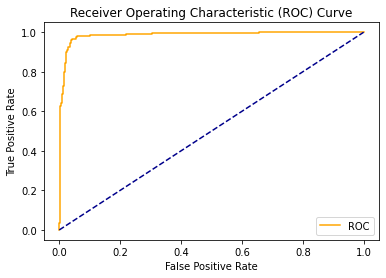

In [ ]:
plot_roc_curve(fpr,tpr)